# Pizza Binary Classification Project CNNs

## By Lethu Mncube

In [50]:
import numpy as np
import pandas as pd
import seaborn as sn
import random
import os
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.transform import resize
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical

This project, similar to project 1, aims to analyze a data set of images referencing pizza and non pizza food items. The project utilizes a dataset that contains 1966 images which are parsed and labelled by the model. The data is then processed to make it readible for our feature extraction. Then the data is split into test and train data, with the train data utilized to train the classification model. Afterwhich the model is tested against the test data to determine the accuracy of the label predictions. 

In [9]:
#Obtaining image paths
main_path = 'pizza_not_pizza/'
sub_path = [x[0] for x in os.walk(main_path)]
labels = []
img_filenames = []

for subfolder_name in sub_path:
    for filename in os.listdir(subfolder_name):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_filenames.append(os.path.join(subfolder_name, filename))
            if subfolder_name == "pizza_not_pizza/not_pizza":
                labels.append("not_pizza")
            elif subfolder_name == "pizza_not_pizza/pizza":
                labels.append("pizza")

labels = np.array(labels)
len(img_filenames)

1966

In [10]:
#generating set of images
img_data = []
for filename in img_filenames:
    image = io.imread(filename)
    img_data.append(image)

len(img_data)

C:\Users\lethu\OneDrive\Documents\Anaconda\lib\site-packages\PIL\TiffImagePlugin.py:845: UserWarning: Truncated File Read
  warnings.warn(str(msg))
C:\Users\lethu\OneDrive\Documents\Anaconda\lib\site-packages\PIL\TiffImagePlugin.py:845: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 0. 
  warnings.warn(str(msg))
C:\Users\lethu\OneDrive\Documents\Anaconda\lib\site-packages\PIL\TiffImagePlugin.py:845: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 3. 
  warnings.warn(str(msg))
C:\Users\lethu\OneDrive\Documents\Anaconda\lib\site-packages\PIL\TiffImagePlugin.py:845: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 11. 
  warnings.warn(str(msg))


1966

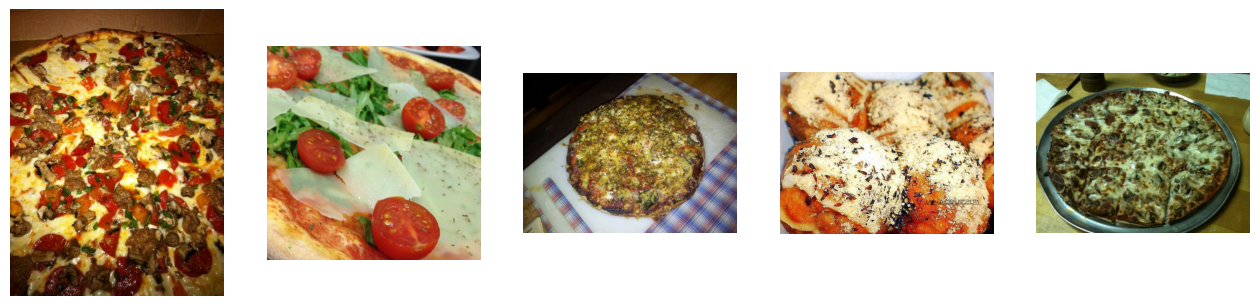

In [46]:
#Viewing images
fig = plt.figure(figsize=[16,16])
rows = 1
cols = 5
for i in range(rows*cols):
    n = random.randint(1,len(img_data))
    image = img_data[n]
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(image)
    plt.axis('off')

plt.show()

#### Image Processing

In [11]:
img_size = (64, 64)
preprocessed_img_data = [resize(img, img_size) for img in img_data]
preprocessed_img_data = np.array(preprocessed_img_data) / 255.0

#### Data Split & Model Compilation

In [13]:
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
categorical_labels = to_categorical(encoded_labels)

X_train, X_test, y_train, y_test = train_test_split(preprocessed_img_data, categorical_labels, test_size=0.2, random_state=42)

In [57]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
40/40 [==============================] - 8s 170ms/step - loss: 0.6937 - accuracy: 0.5163 - val_loss: 0.6937 - val_accuracy: 0.4635
Epoch 2/30
40/40 [==============================] - 5s 121ms/step - loss: 0.6930 - accuracy: 0.5115 - val_loss: 0.6943 - val_accuracy: 0.4635
Epoch 3/30
40/40 [==============================] - 5s 117ms/step - loss: 0.6931 - accuracy: 0.5115 - val_loss: 0.6949 - val_accuracy: 0.4635
Epoch 4/30
40/40 [==============================] - 5s 117ms/step - loss: 0.6931 - accuracy: 0.5115 - val_loss: 0.6953 - val_accuracy: 0.4635
Epoch 5/30
40/40 [==============================] - 5s 119ms/step - loss: 0.6930 - accuracy: 0.5115 - val_loss: 0.6952 - val_accuracy: 0.4635
Epoch 6/30
40/40 [==============================] - 5s 119ms/step - loss: 0.6930 - accuracy: 0.5115 - val_loss: 0.6950 - val_accuracy: 0.4635
Epoch 7/30
40/40 [==============================] - 5s 118ms/step - loss: 0.6929 - accuracy: 0.5115 - val_loss: 0.6950 - val_accuracy: 0.4635
Epoch 

In [35]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss}, Test accuracy: {test_accuracy}")

13/13 [==============================] - 0s 26ms/step - loss: 0.6937 - accuracy: 0.4924
Test loss: 0.6936852931976318, Test accuracy: 0.49238577485084534


#### Model Test

In [36]:
test_predictions = model.predict(X_test)
predicted_test_labels = np.argmax(test_predictions, axis=1)

13/13 [==============================] - 0s 24ms/step


In [55]:
def gen_confusion_matrix(y_test, predicted_test_labels, labels):
    num_classes = len(labels)
    epsilon = 0.000001
    conf = np.zeros([num_classes, num_classes])

    for i in range(len(y_test)):
        real_t = np.argmax(y_test[i])
        guess_t = predicted_test_labels[i]
        conf[real_t, guess_t] += 1

    rowsums = np.sum(conf, axis=1)
    rowsums = np.reshape(rowsums, [num_classes, 1])
    rowsums = np.repeat(rowsums, num_classes, axis=1)
    conf = conf / (rowsums + epsilon)
    
    df_cm = pd.DataFrame(conf, index=[i for i in labels], columns=[i for i in labels])
    plt.figure(figsize=(16, 16))
    sn.heatmap(df_cm, annot=True)

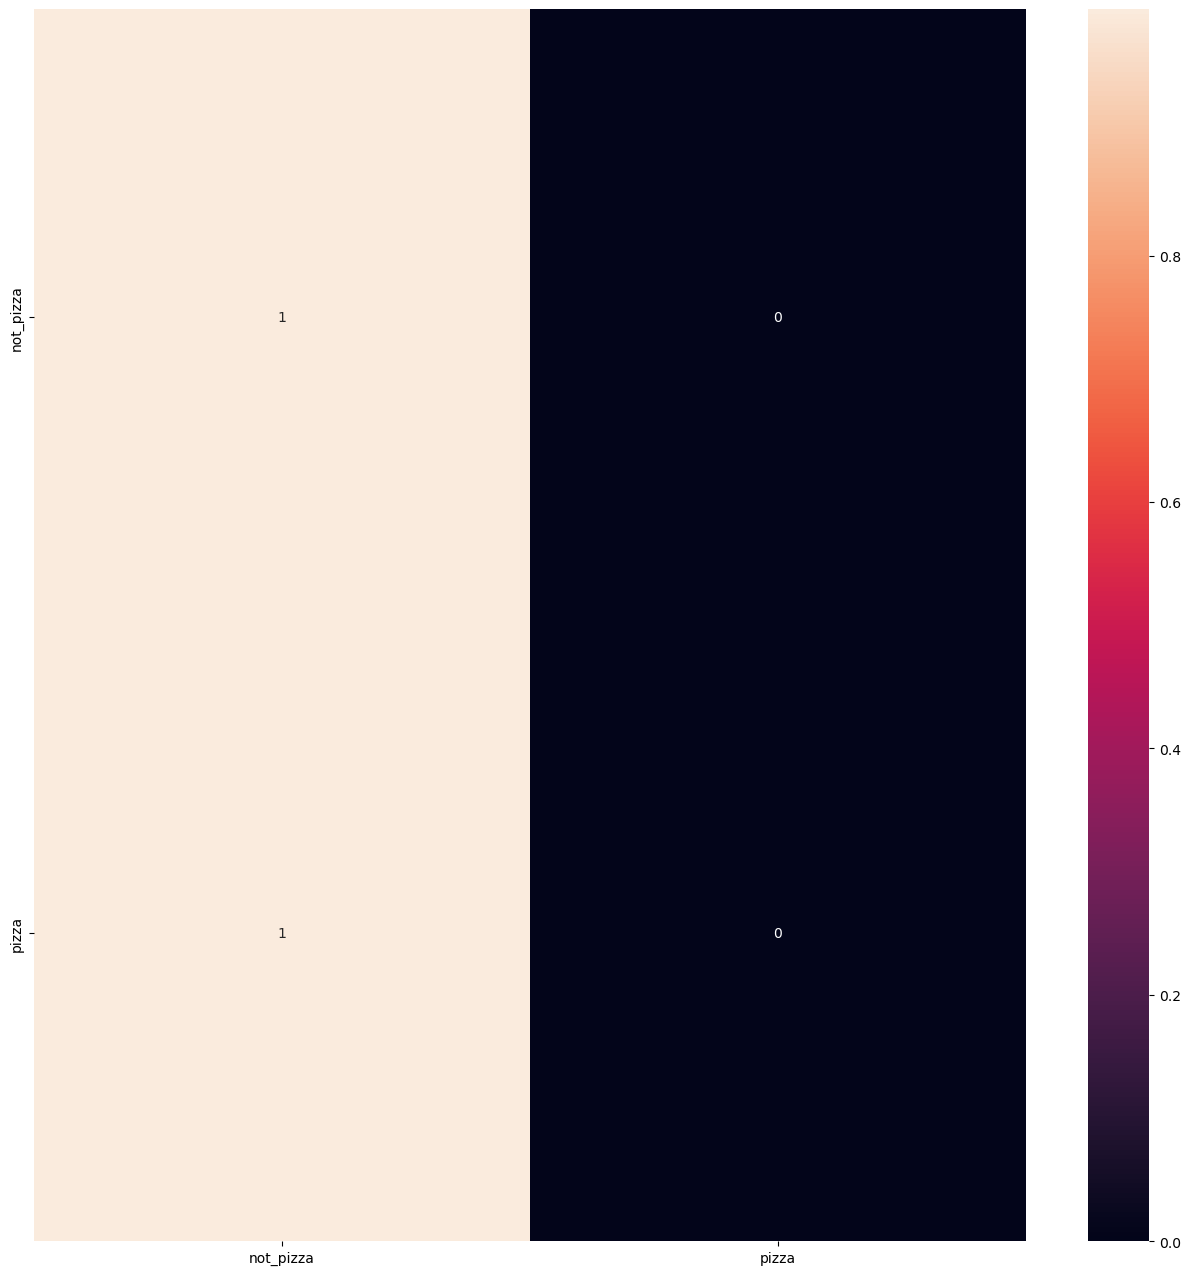

In [56]:
gen_confusion_matrix(y_test, predicted_test_labels, label_encoder.classes_)

In [54]:
decoded_predicted_test_labels = label_encoder.inverse_transform(predicted_test_labels)
decoded_true_test_labels = label_encoder.inverse_transform(np.argmax(y_test, axis=1))

In [58]:
def display_predictions(model, X_test, y_test, label_encoder, num_images):
    random_vals = random.sample(range(X_test.shape[0]), num_images)
    random_X_test = X_test[random_vals]
    random_y_test = y_test[random_vals]

    y_pred = model.predict(random_X_test)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_test_labels = np.argmax(random_y_test, axis=1)

    plt.figure(figsize=(12, 12))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(random_X_test[i] * 255)
        true_label = label_encoder.inverse_transform([y_test_labels[i]])[0]
        pred_label = label_encoder.inverse_transform([y_pred_labels[i]])[0]
        plt.xlabel(f'True: {true_label}\nPred: {pred_label}')
    plt.show()

1/1 [==============================] - 0s 435ms/step


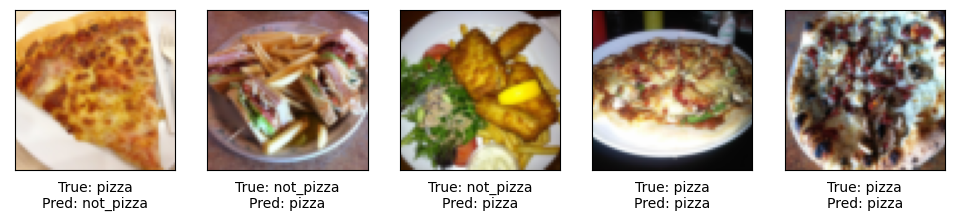

In [59]:
display_predictions(model, X_test, y_test, label_encoder, num_images=5)